In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.stats import gaussian_kde
import numpy

import warnings
import umap
warnings.filterwarnings("ignore") 

/home/tuan-vu.tran/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/tuan-vu.tran/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/tuan-vu.tran/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDepr

In [4]:
# upload cell_by_gene file
mARN_df = pd.read_csv('~/Bureau/js/data/HumanOvarianCancerPatient2Slice2_cell_by_gene.csv', index_col = 0)
mARN_df

,PDK4,CCL26,CX3CL1,CD4,SNAI2,TNFRSF17,ICAM3,TBX21,FAP,NFKB2,...,Blank-20,Blank-31,Blank-34,CXCR5,IL21,Blank-17,Blank-29,Blank-32,Blank-46,Blank-24
cell,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71376,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71377,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71378,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tysserand

In [5]:
try:
    from tysserand import tysserand as ty
except ModuleNotFoundError:
    print("tysserand is not installed, you can install it with `pip install tysserand`")
    print("loading tysserand from local files...")
    # If you haven't installed tysserand with pip, but its code is on your hard drive:
    import sys
    sys.path.extend(['../../tysserand']) # change directory accordingly
    from tysserand import tysserand as ty
    print("tysserand loaded successfully")

tysserand is not installed, you can install it with `pip install tysserand`
loading tysserand from local files...
tysserand loaded successfully


In [6]:
meta_data = pd.read_csv('/home/tuan-vu.tran/Bureau/js/data/HumanOvarianCancerPatient2Slice2_cell_metadata.csv', index_col = 0)
coords = meta_data.loc[:,['center_x','center_y']].values
pairs = ty.build_knn(coords, k=6)
distances = ty.distance_neighbors(coords, pairs)

In [7]:
meta_data

,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y
7650,1413,2164.001882,10145.793273,5611.686548,10135.374848,10156.211698,5602.912342,5620.460755
7654,1413,799.191933,9975.309392,5626.726410,9969.399281,9981.219504,5621.396968,5632.055852
7655,1413,1499.366735,10129.182535,5630.601069,10120.147947,10138.217123,5623.778992,5637.423145
7656,1413,1476.039756,10112.691788,5635.037877,10106.215328,10119.168248,5626.804584,5643.271170
7657,1413,1076.872046,10151.573577,5634.673399,10146.395020,10156.752135,5627.678259,5641.668539
...,...,...,...,...,...,...,...,...
17845,1958,296.890865,10003.931311,10127.617506,10000.592767,10007.269856,10123.928582,10131.306430
17846,1958,722.081647,10196.370832,10137.641788,10190.151248,10202.590415,10131.866041,10143.417536
17847,1958,351.389038,10134.328193,10184.749637,10130.839066,10137.817320,10180.632494,10188.866779
17850,1958,754.320421,10011.495350,10049.177307,10007.284364,10015.706336,10040.688113,10057.666500


## Squidpy 

In [8]:
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
from copy import deepcopy
from pathlib import Path
%matplotlib inline

In [9]:
vizgen_dir = "/home/tuan-vu.tran/Bureau/js/data"
adata = sq.read.vizgen(
               vizgen_dir,
               counts_file='HumanOvarianCancerPatient2Slice2_cell_by_gene.csv',
               meta_file='HumanOvarianCancerPatient2Slice2_cell_metadata.csv'
)

In [10]:
adata.obs

,fov,volume,min_x,max_x,min_y,max_y
0,1427,330.525376,10553.330314,10561.315950,5763.504083,5769.057512
1,1427,405.287709,10385.388076,10393.473326,5766.270255,5773.925720
2,1427,849.395090,10363.115276,10374.781600,5766.382841,5778.341751
3,1427,1400.677696,10401.540485,10416.898807,5767.062322,5781.804782
4,1427,750.457170,10370.865924,10381.046486,5770.301613,5781.771764
...,...,...,...,...,...,...
71376,1782,429.768569,5342.952715,5352.067566,8599.661159,8606.815878
71377,1782,844.165861,5198.037547,5211.279260,8600.113112,8609.669784
71378,1782,667.168182,5286.663175,5293.676114,8604.173745,8618.825278
71379,1782,612.769870,5274.784859,5282.444209,8604.744517,8618.259717


In [11]:
# Make gene names unique and calculate QC metrics
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"],percent_top=(50, 100, 200, 300), inplace=True)

In [12]:
# Data Pre-processing
print('normalize total')
sc.pp.normalize_total(adata)
print('log transform')
sc.pp.log1p(adata)
print('scale')
sc.pp.scale(adata, max_value=10)

normalize total
log transform
scale


In [13]:
# Dimensionality Reduction, Neighbor Calculation, and Clustering
resolution = 1.5
print('PCA')
sc.tl.pca(adata, svd_solver='arpack')
print('neighbors')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

PCA
neighbors


In [14]:
print('UMAP')
sc.tl.umap(adata)
print('Leiden')
sc.tl.leiden(adata, resolution=resolution)

UMAP
Leiden


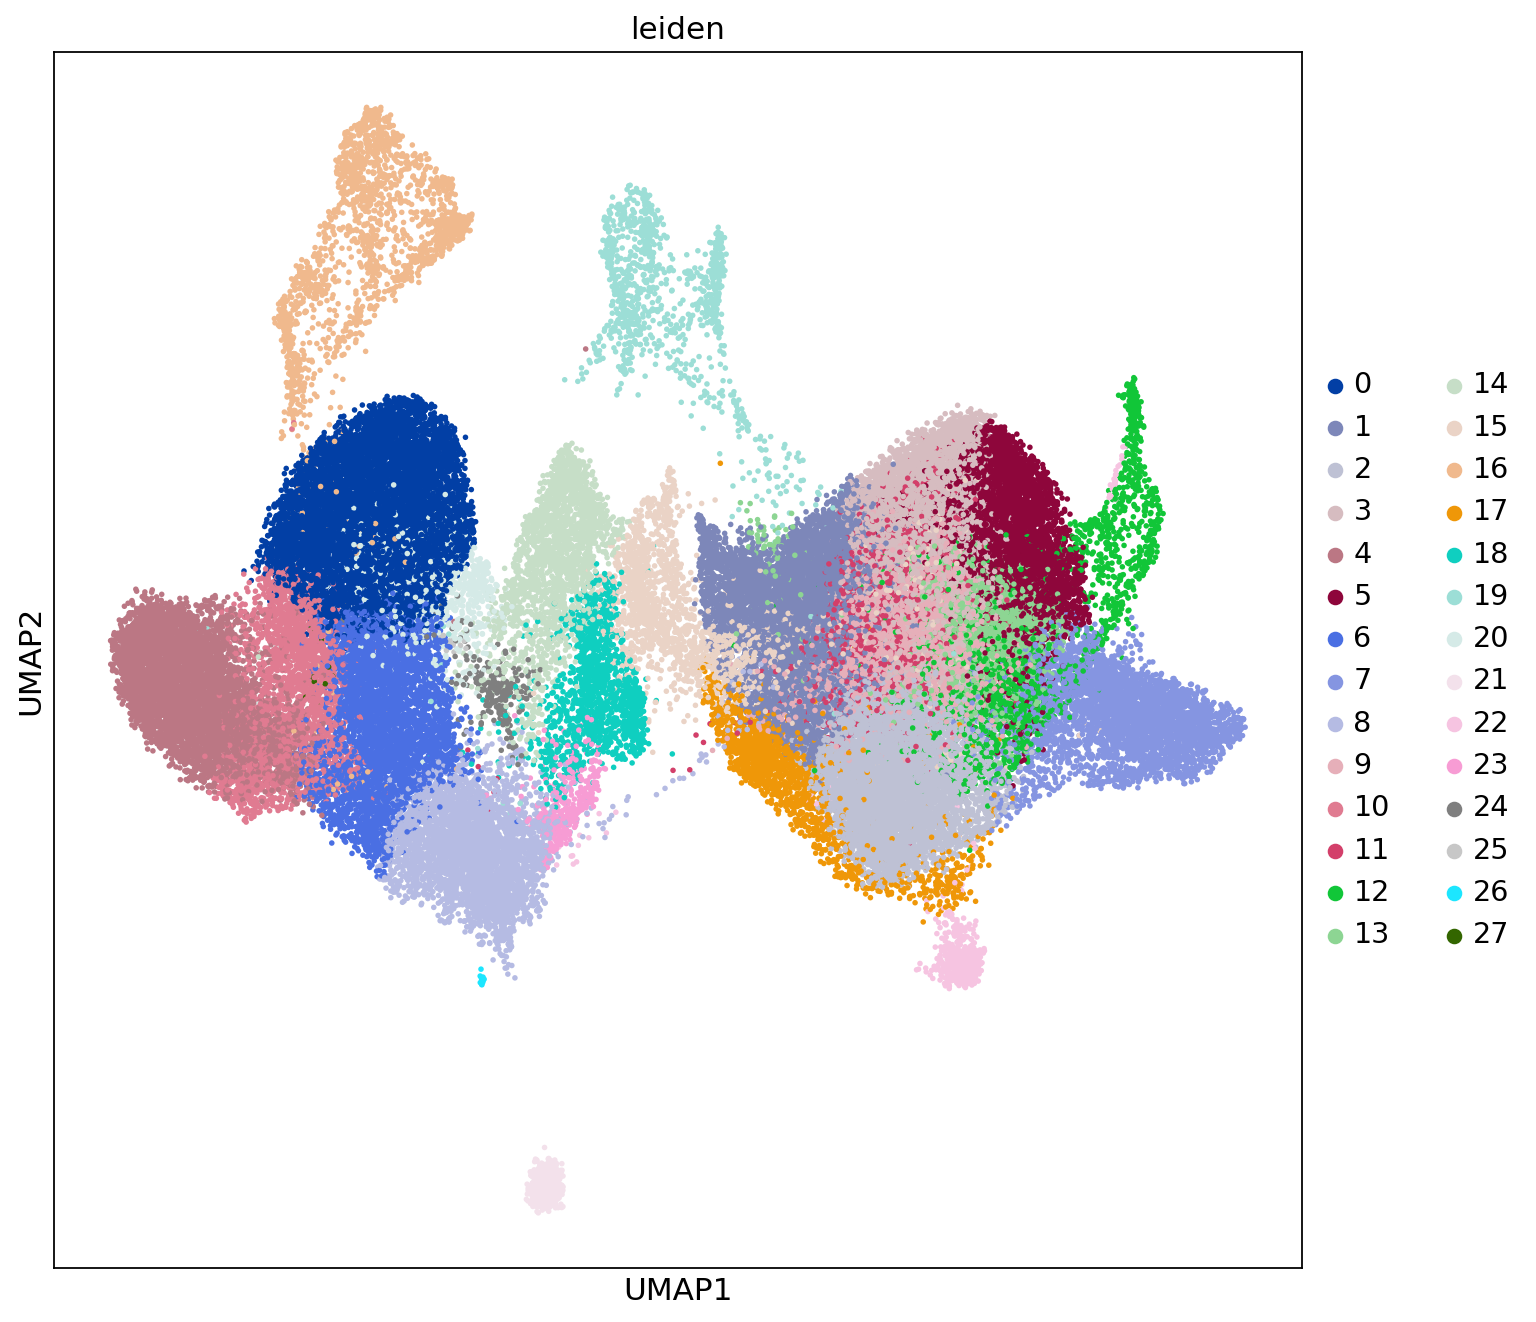

In [15]:
# UMAP with Leiden Clustering Labels
sc.set_figure_params(figsize=(10,10))
sc.pl.umap(adata, color=['leiden'], size=25)

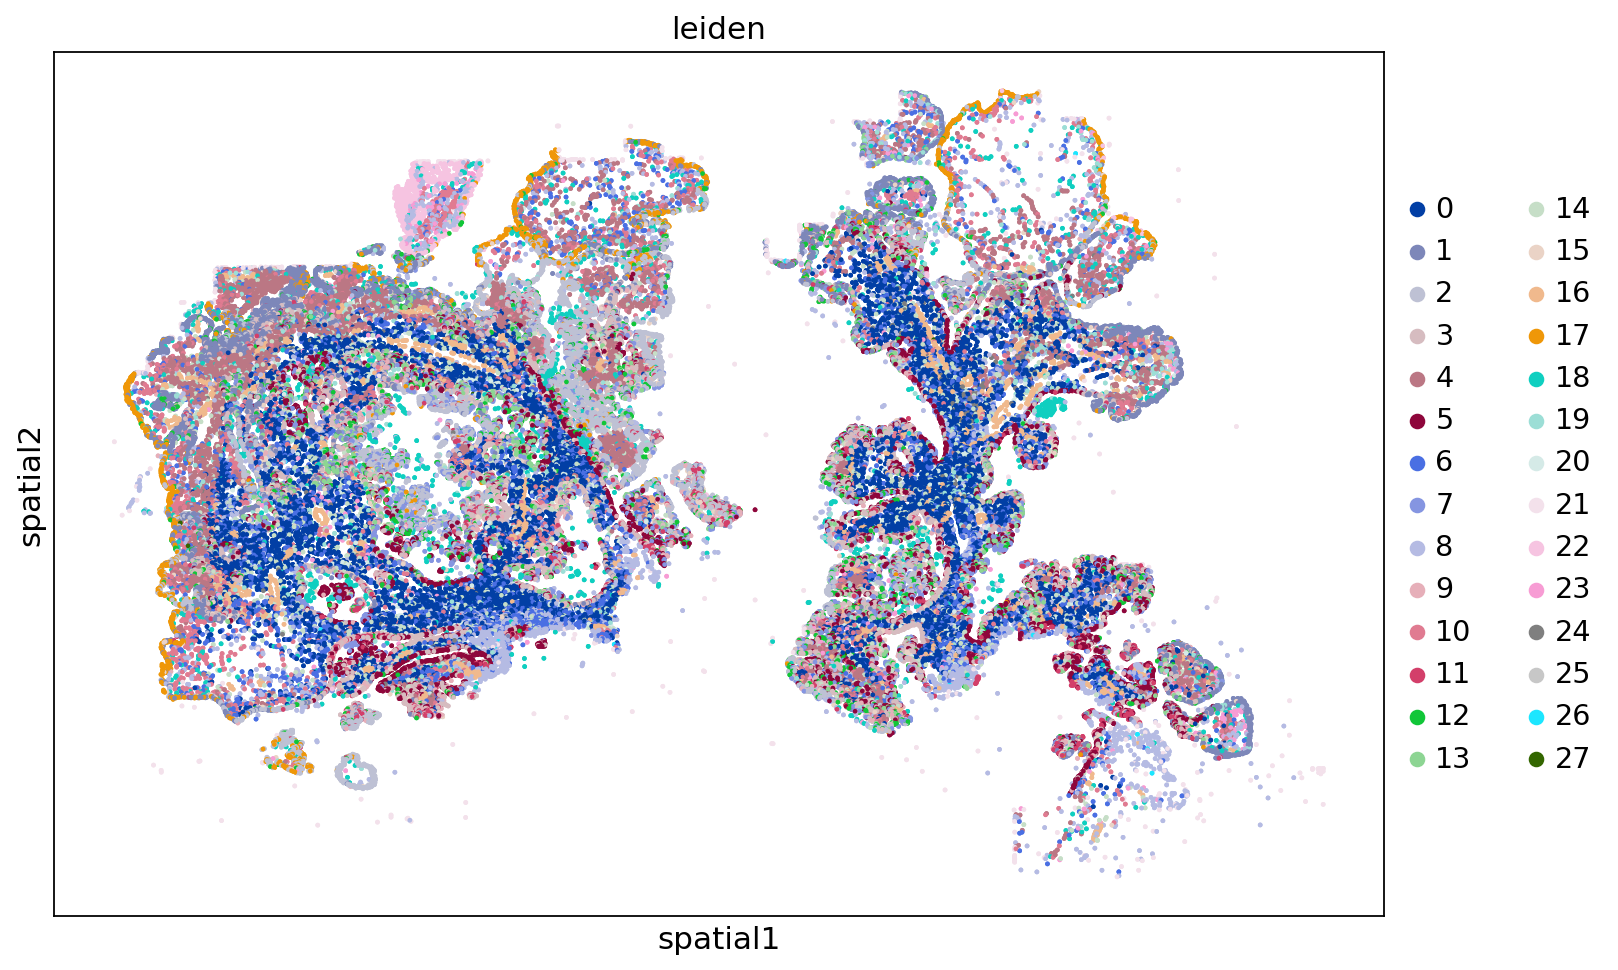

In [16]:
sq.pl.spatial_scatter(
    adata, shape=None, color="leiden", size=5, library_id="spatial", figsize=(10, 10)
)

In [17]:
# Assign Cell Types
gene_panel = "gene_cell_type_ovarian.xlsx"
df_ref_panel_ini = pd.read_excel(gene_panel, index_col=0)
df_ref_panel = df_ref_panel_ini.iloc[1:, :1]
df_ref_panel.index.name = "Genes"
df_ref_panel.columns = ["Function"]

# Regroupe gene which has mutiple function
result = df_ref_panel.groupby('Genes', as_index=True)['Function'].apply(lambda x: '_'.join(x.astype(str)))

df_ref_panel = result.to_frame()

# Assign marker gene metadata using reference dataset
marker_genes = df_ref_panel[
    df_ref_panel["Function"].str.contains("marker")
].index.tolist()

meta_gene = deepcopy(adata.var)
common_marker_genes = list(set(meta_gene.index.tolist()).intersection(marker_genes))
meta_gene.loc[common_marker_genes, "Markers"] = df_ref_panel.loc[
    common_marker_genes, "Function"
]
meta_gene["Markers"] = meta_gene["Markers"].apply(
    lambda x: "N.A." if "marker" not in str(x) else x
)
meta_gene["Markers"].value_counts()

Markers
N.A.                                                  418
T cells marker                                         27
Macrophages marker                                     15
Monocytes marker                                       14
Macrophages marker_Monocytes marker                    10
B cells_Monocytes marker                                3
B cells_Macrophages marker_Monocytes marker             2
Macrophages marker_T cells marker_Monocytes marker      2
B cells_Macrophages marker                              2
Macrophages marker_T cells marker                       2
B cells_T cells marker_Monocytes marker                 1
B cells_Macrophages marker_T cells marker               1
Granulosa cells _T cells marker                         1
B cells_T cells marker                                  1
Glomus cells_Macrophages marker                         1
Name: count, dtype: int64

In [18]:
# Calculate Leiden Cluster Average Expression Signatures

ser_counts = adata.obs["leiden"].value_counts()
ser_counts.name = "cell counts"
meta_leiden = pd.DataFrame(ser_counts)

cat_name = "leiden"
sig_leiden = pd.DataFrame(
    columns=adata.var_names, index=adata.obs[cat_name].cat.categories
)

for clust in adata.obs[cat_name].cat.categories:
    sig_leiden.loc[clust] = adata[adata.obs[cat_name].isin([clust]), :].X.mean(0)
sig_leiden = sig_leiden.transpose()
leiden_clusters = ["Leiden-" + str(x) for x in sig_leiden.columns.tolist()]
sig_leiden.columns = leiden_clusters
meta_leiden.index = sig_leiden.columns.tolist()

meta_leiden["leiden"] = pd.Series(
    meta_leiden.index.tolist(), index=meta_leiden.index.tolist()
)

In [19]:
# Assign Cell Type Based on Top Expressed Marker Genes

meta_gene = pd.DataFrame(index=sig_leiden.index.tolist())
meta_gene["info"] = pd.Series("", index=meta_gene.index.tolist())
meta_gene["Markers"] = pd.Series("N.A.", index=sig_leiden.index.tolist())
meta_gene.loc[common_marker_genes, "Markers"] = df_ref_panel.loc[
    common_marker_genes, "Function"
]

meta_leiden["Cell_Type"] = pd.Series("N.A.", index=meta_leiden.index.tolist())

# num_top_genes to change
num_top_genes = 100
for inst_cluster in leiden_clusters:
    top_genes = (
        sig_leiden[inst_cluster]
        .sort_values(ascending=False)
        .index.tolist()[:num_top_genes]
    )
    
    inst_ser = meta_gene.loc[top_genes, "Markers"]
    inst_ser = inst_ser[inst_ser != "N.A."]
    ser_counts = inst_ser.value_counts()

    max_count = ser_counts.max()

    max_cat = "_".join(sorted(ser_counts[ser_counts == max_count].index.tolist()))
    max_cat = max_cat.replace(" marker", "").replace(" ", "-")

    print(inst_cluster, max_cat)
    meta_leiden.loc[inst_cluster, "Cell_Type"] = max_cat

# rename clusters
meta_leiden["name"] = meta_leiden.apply(
    lambda x: x["Cell_Type"] + "_" + x["leiden"], axis=1
)
leiden_names = meta_leiden["name"].values.tolist()
meta_leiden.index = leiden_names


# transfer cell type labels to single cells
leiden_to_cell_type = deepcopy(meta_leiden)
leiden_to_cell_type.set_index("leiden", inplace=True)
leiden_to_cell_type.index.name = None

adata.obs["Cell_Type"] = adata.obs["leiden"].apply(
    lambda x: leiden_to_cell_type.loc["Leiden-" + str(x), "Cell_Type"]
)
adata.obs["Cluster"] = adata.obs["leiden"].apply(
    lambda x: leiden_to_cell_type.loc["Leiden-" + str(x), "name"]
)

Leiden-0 Monocytes_T-cells
Leiden-1 Macrophages_Monocytes
Leiden-2 Monocytes
Leiden-3 Monocytes
Leiden-4 Macrophages_T-cells
Leiden-5 Monocytes
Leiden-6 T-cells
Leiden-7 Monocytes
Leiden-8 T-cells
Leiden-9 Monocytes
Leiden-10 Macrophages_Macrophages_Monocytes_Monocytes
Leiden-11 Monocytes
Leiden-12 Monocytes
Leiden-13 Monocytes
Leiden-14 Macrophages_Monocytes_Monocytes
Leiden-15 Macrophages_Monocytes_Monocytes
Leiden-16 T-cells
Leiden-17 Macrophages_Monocytes
Leiden-18 Macrophages
Leiden-19 T-cells
Leiden-20 Macrophages_Monocytes_Monocytes
Leiden-21 T-cells
Leiden-22 Macrophages_Monocytes
Leiden-23 Monocytes
Leiden-24 Monocytes
Leiden-25 Macrophages
Leiden-26 T-cells
Leiden-27 T-cells


## Mosna

In [20]:
import sys
sys.path.extend(['../../NeighborsAggregationStatistics', '../../mosna_3DMERFISH/mosna',])
import mosna
import seaborn as sns
from importlib import reload
ty = reload(ty)
mosna = reload(mosna)
sns = reload(sns)
plt = reload(plt)

In [21]:
nodes = pd.DataFrame(data=coords, columns=['x', 'y'])
nodes['cell type'] = adata.obs.loc[:,"Cell_Type"].tolist()
nodes = nodes.join(pd.get_dummies(nodes['cell type']))
nodes

,x,y,cell type,Macrophages,Macrophages_Macrophages_Monocytes_Monocytes,Macrophages_Monocytes,Macrophages_Monocytes_Monocytes,Macrophages_T-cells,Monocytes,Monocytes_T-cells,T-cells
0,10145.793273,5611.686548,T-cells,False,False,False,False,False,False,False,True
1,9975.309392,5626.726410,T-cells,False,False,False,False,False,False,False,True
2,10129.182535,5630.601069,T-cells,False,False,False,False,False,False,False,True
3,10112.691788,5635.037877,Macrophages_Monocytes,False,False,True,False,False,False,False,False
4,10151.573577,5634.673399,Monocytes,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
71376,10003.931311,10127.617506,Monocytes_T-cells,False,False,False,False,False,False,True,False
71377,10196.370832,10137.641788,Macrophages_Monocytes,False,False,True,False,False,False,False,False
71378,10134.328193,10184.749637,Monocytes,False,False,False,False,False,True,False,False
71379,10011.495350,10049.177307,Monocytes,False,False,False,False,False,True,False,False


In [64]:
edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
edges

,source,target
0,0,2
1,0,3
2,0,4
3,0,21
4,0,37
...,...,...
250403,71375,71376
250404,71375,71380
250405,71376,71380
250406,71377,71378


In [65]:
attributes = nodes['cell type'].unique()
attributes

array(['T-cells', 'Macrophages_Monocytes', 'Monocytes',
       'Macrophages_Macrophages_Monocytes_Monocytes', 'Macrophages',
       'Macrophages_T-cells', 'Monocytes_T-cells',
       'Macrophages_Monocytes_Monocytes'], dtype=object)

In [66]:
# Network statistics
mixmat = mosna.mixing_matrix(nodes, edges, attributes)
assort = mosna.attribute_ac(mixmat)

# ------ Randomization ------
mixmat_rand, assort_rand = mosna.randomized_mixmat(nodes, edges, attributes, n_shuffle=500, parallel=False)
mixmat_mean, mixmat_std, mixmat_zscore = mosna.zscore(mixmat, mixmat_rand, return_stats=True)
assort_mean, assort_std, assort_zscore = mosna.zscore(assort, assort_rand, return_stats=True)

randomization: 100%|██████████████████████████| 500/500 [09:52<00:00,  1.19s/it]


In [67]:
mixmat = mosna.mixmat_to_df(mixmat, attributes)
mixmat_zscore = mosna.mixmat_to_df(mixmat_zscore, attributes)

Assortativité des clusters: 0.18617007585835435
Z-scored assortativité des clusters: 195.1236839653089


<Axes: >

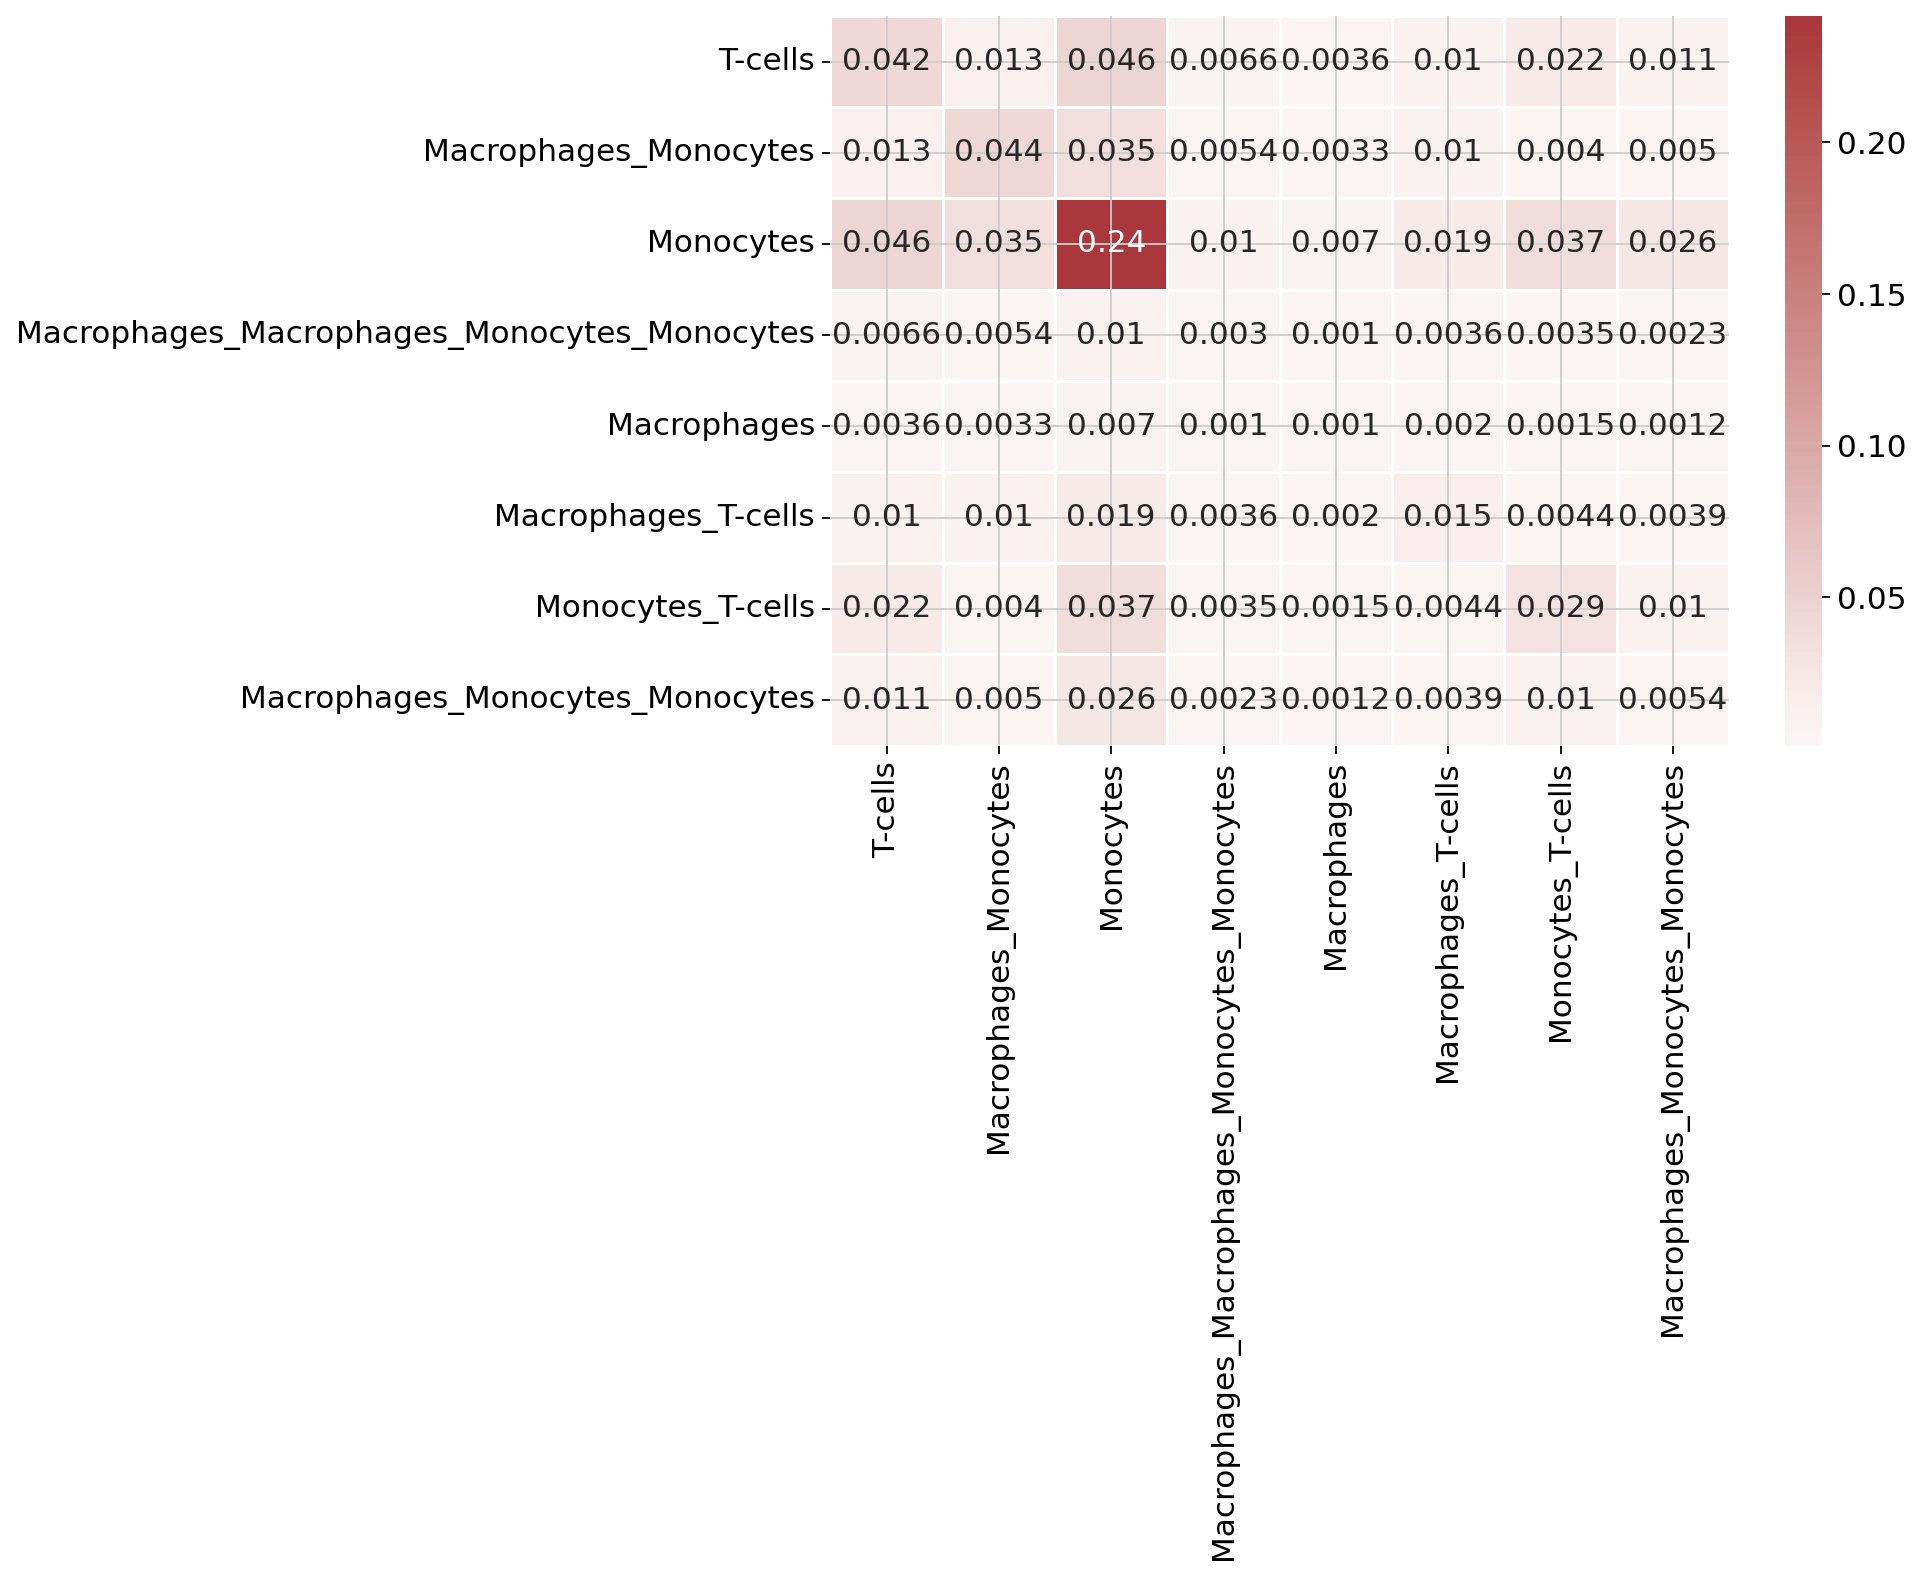

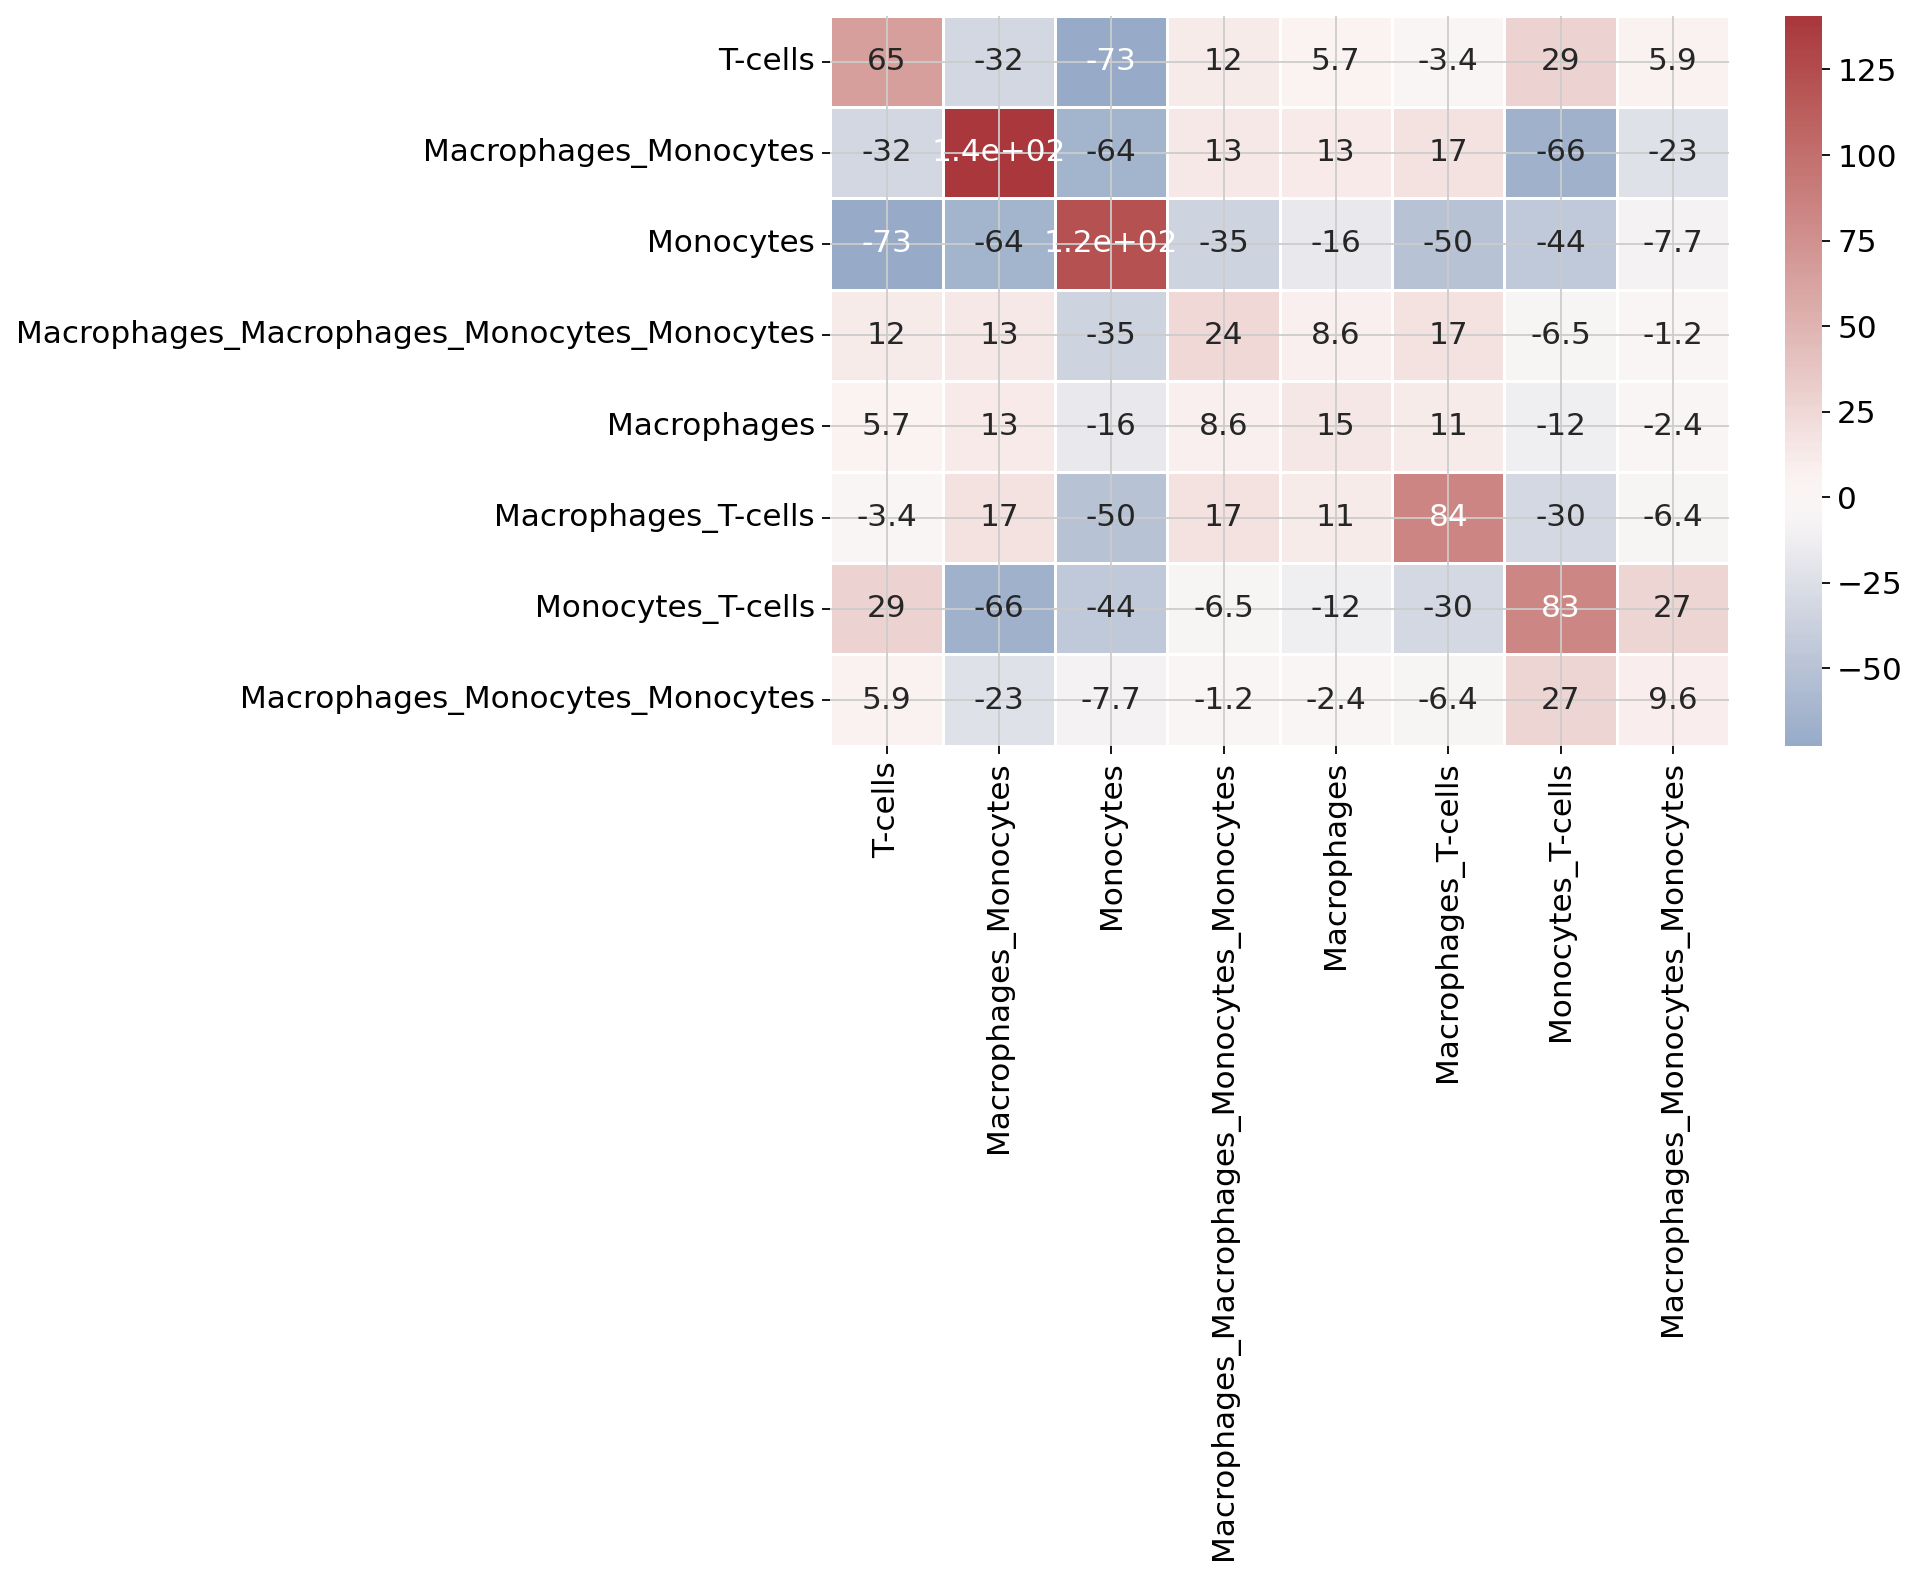

In [69]:
print("Assortativité des clusters: {}".format(assort))
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(mixmat, center=0, cmap="vlag", annot=True, linewidths=.5, ax=ax)

print("Z-scored assortativité des clusters: {}".format(assort_zscore))
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(mixmat_zscore, center=0, cmap="vlag", annot=True, linewidths=.5, ax=ax)

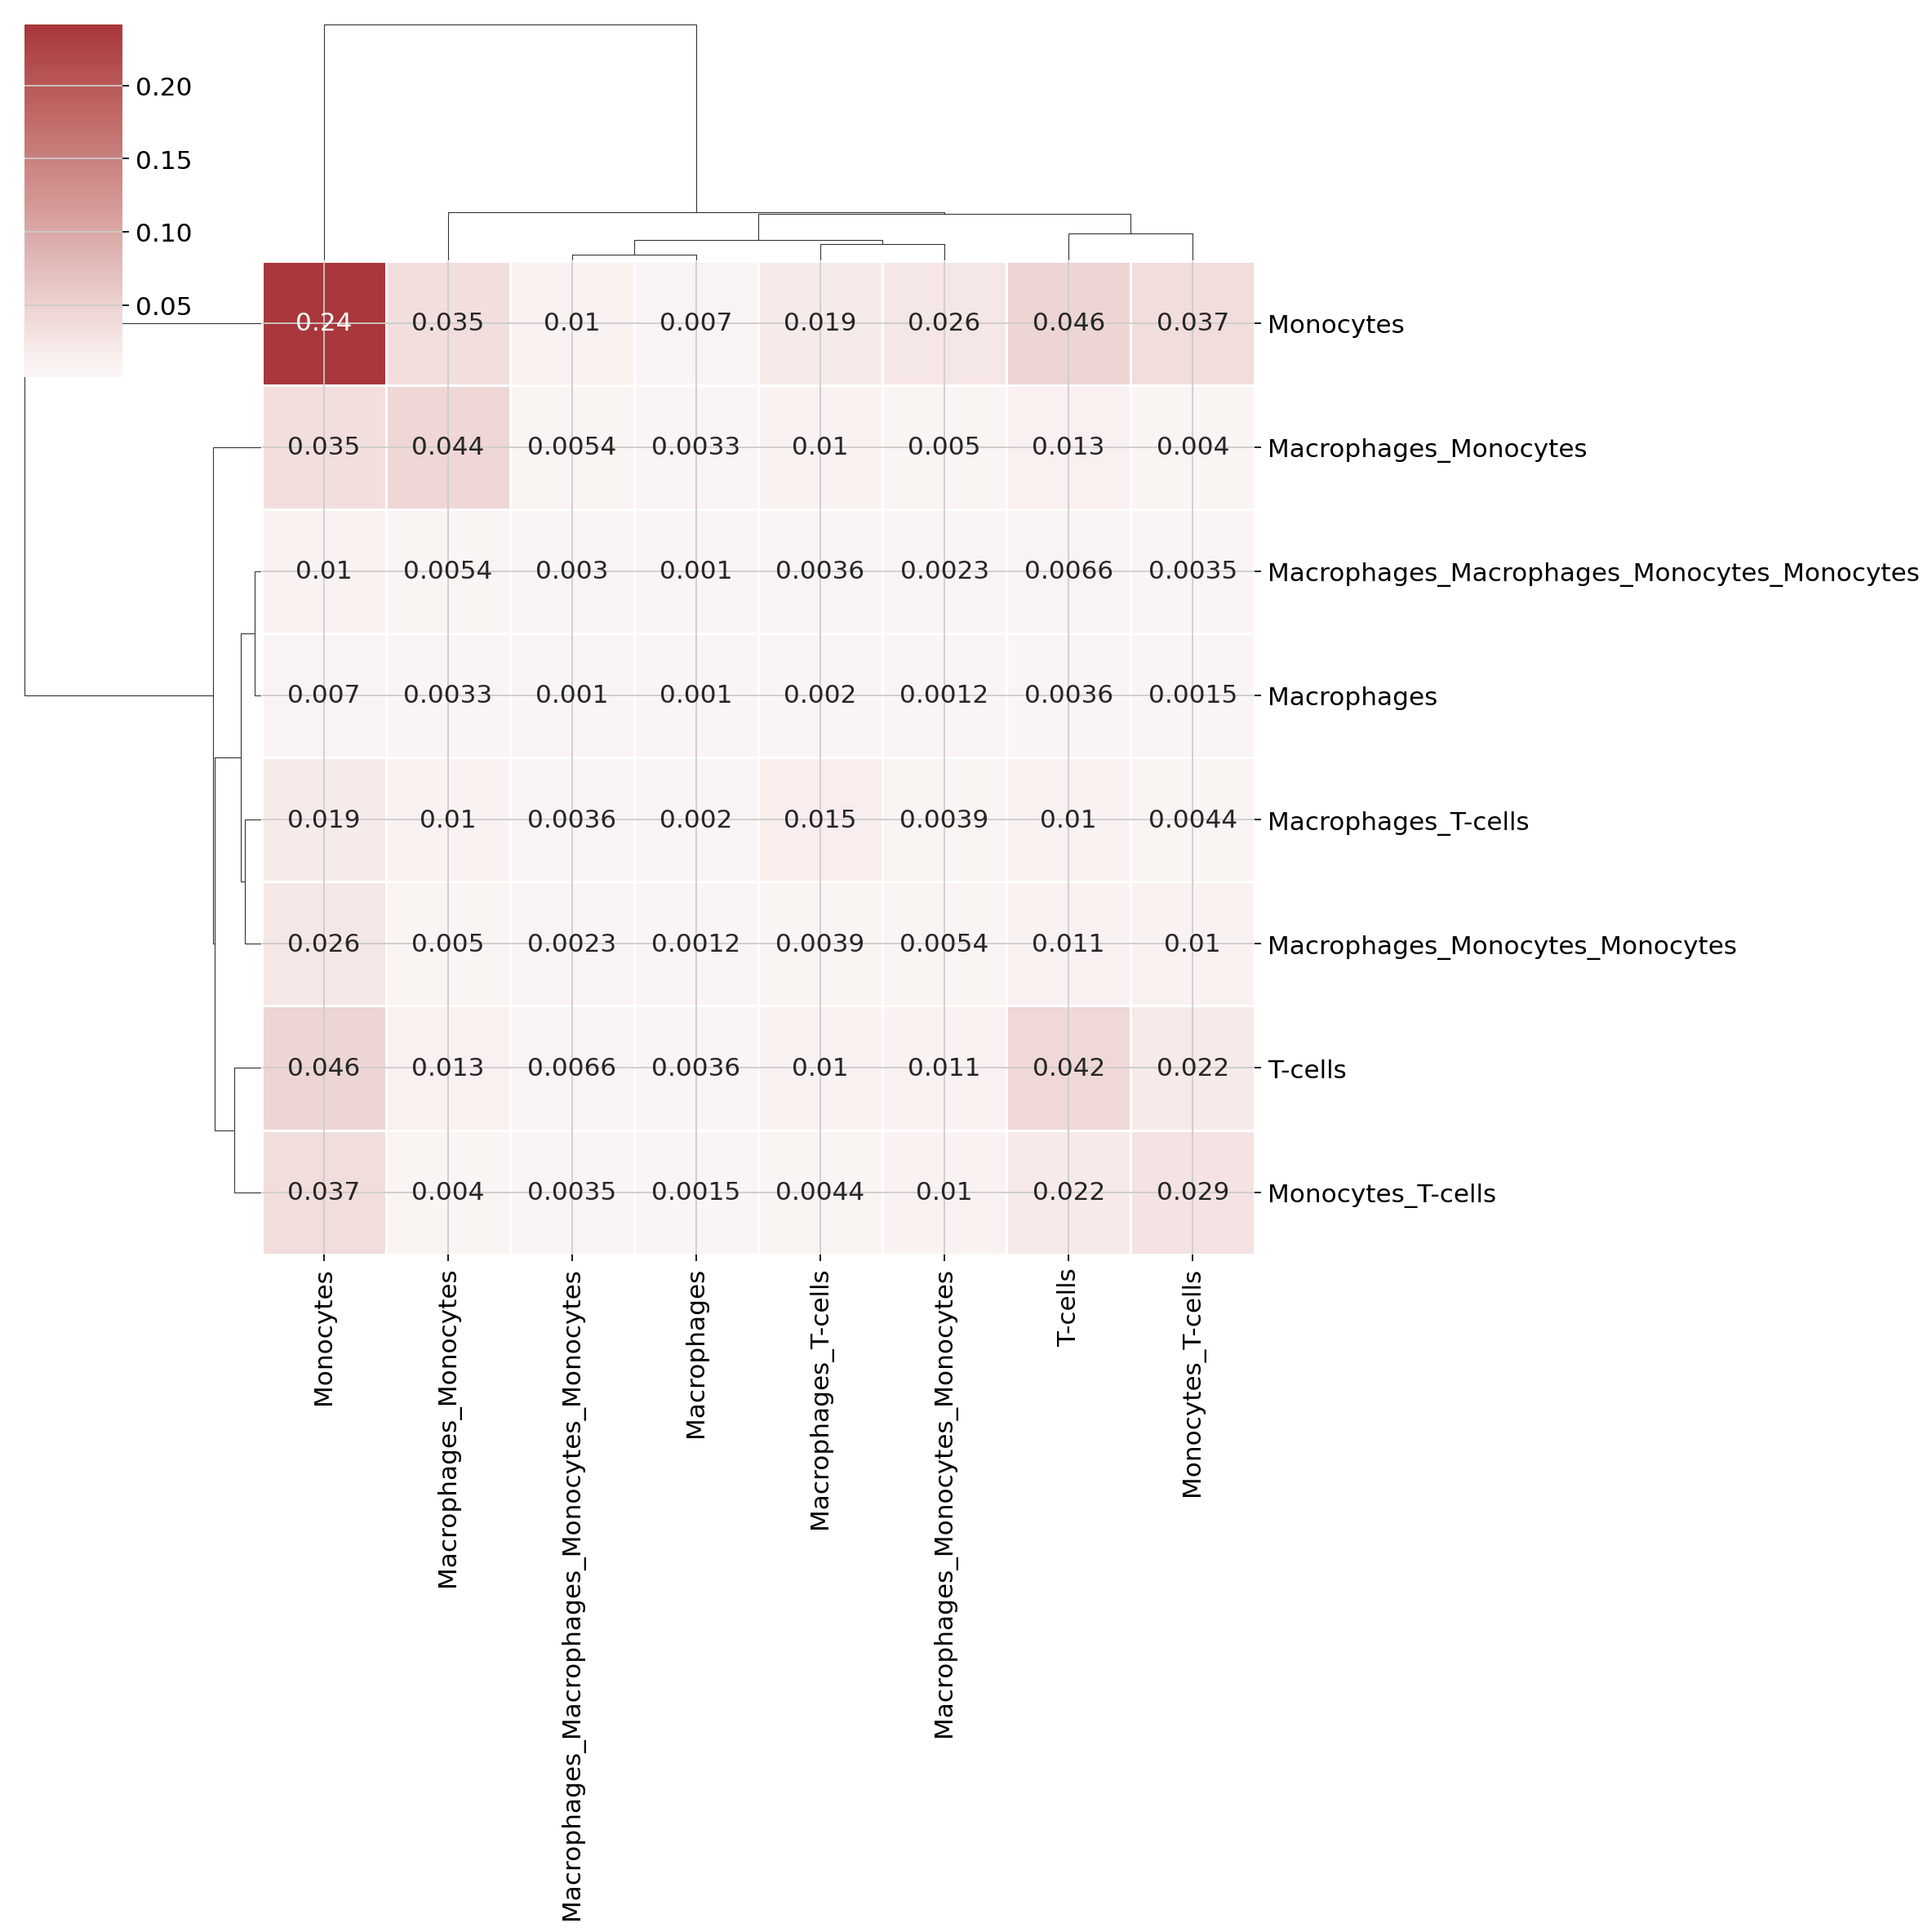

In [75]:
sns.clustermap(mixmat, center=0, cmap="vlag", annot=True, linewidths=.5, figsize=(15, 15))

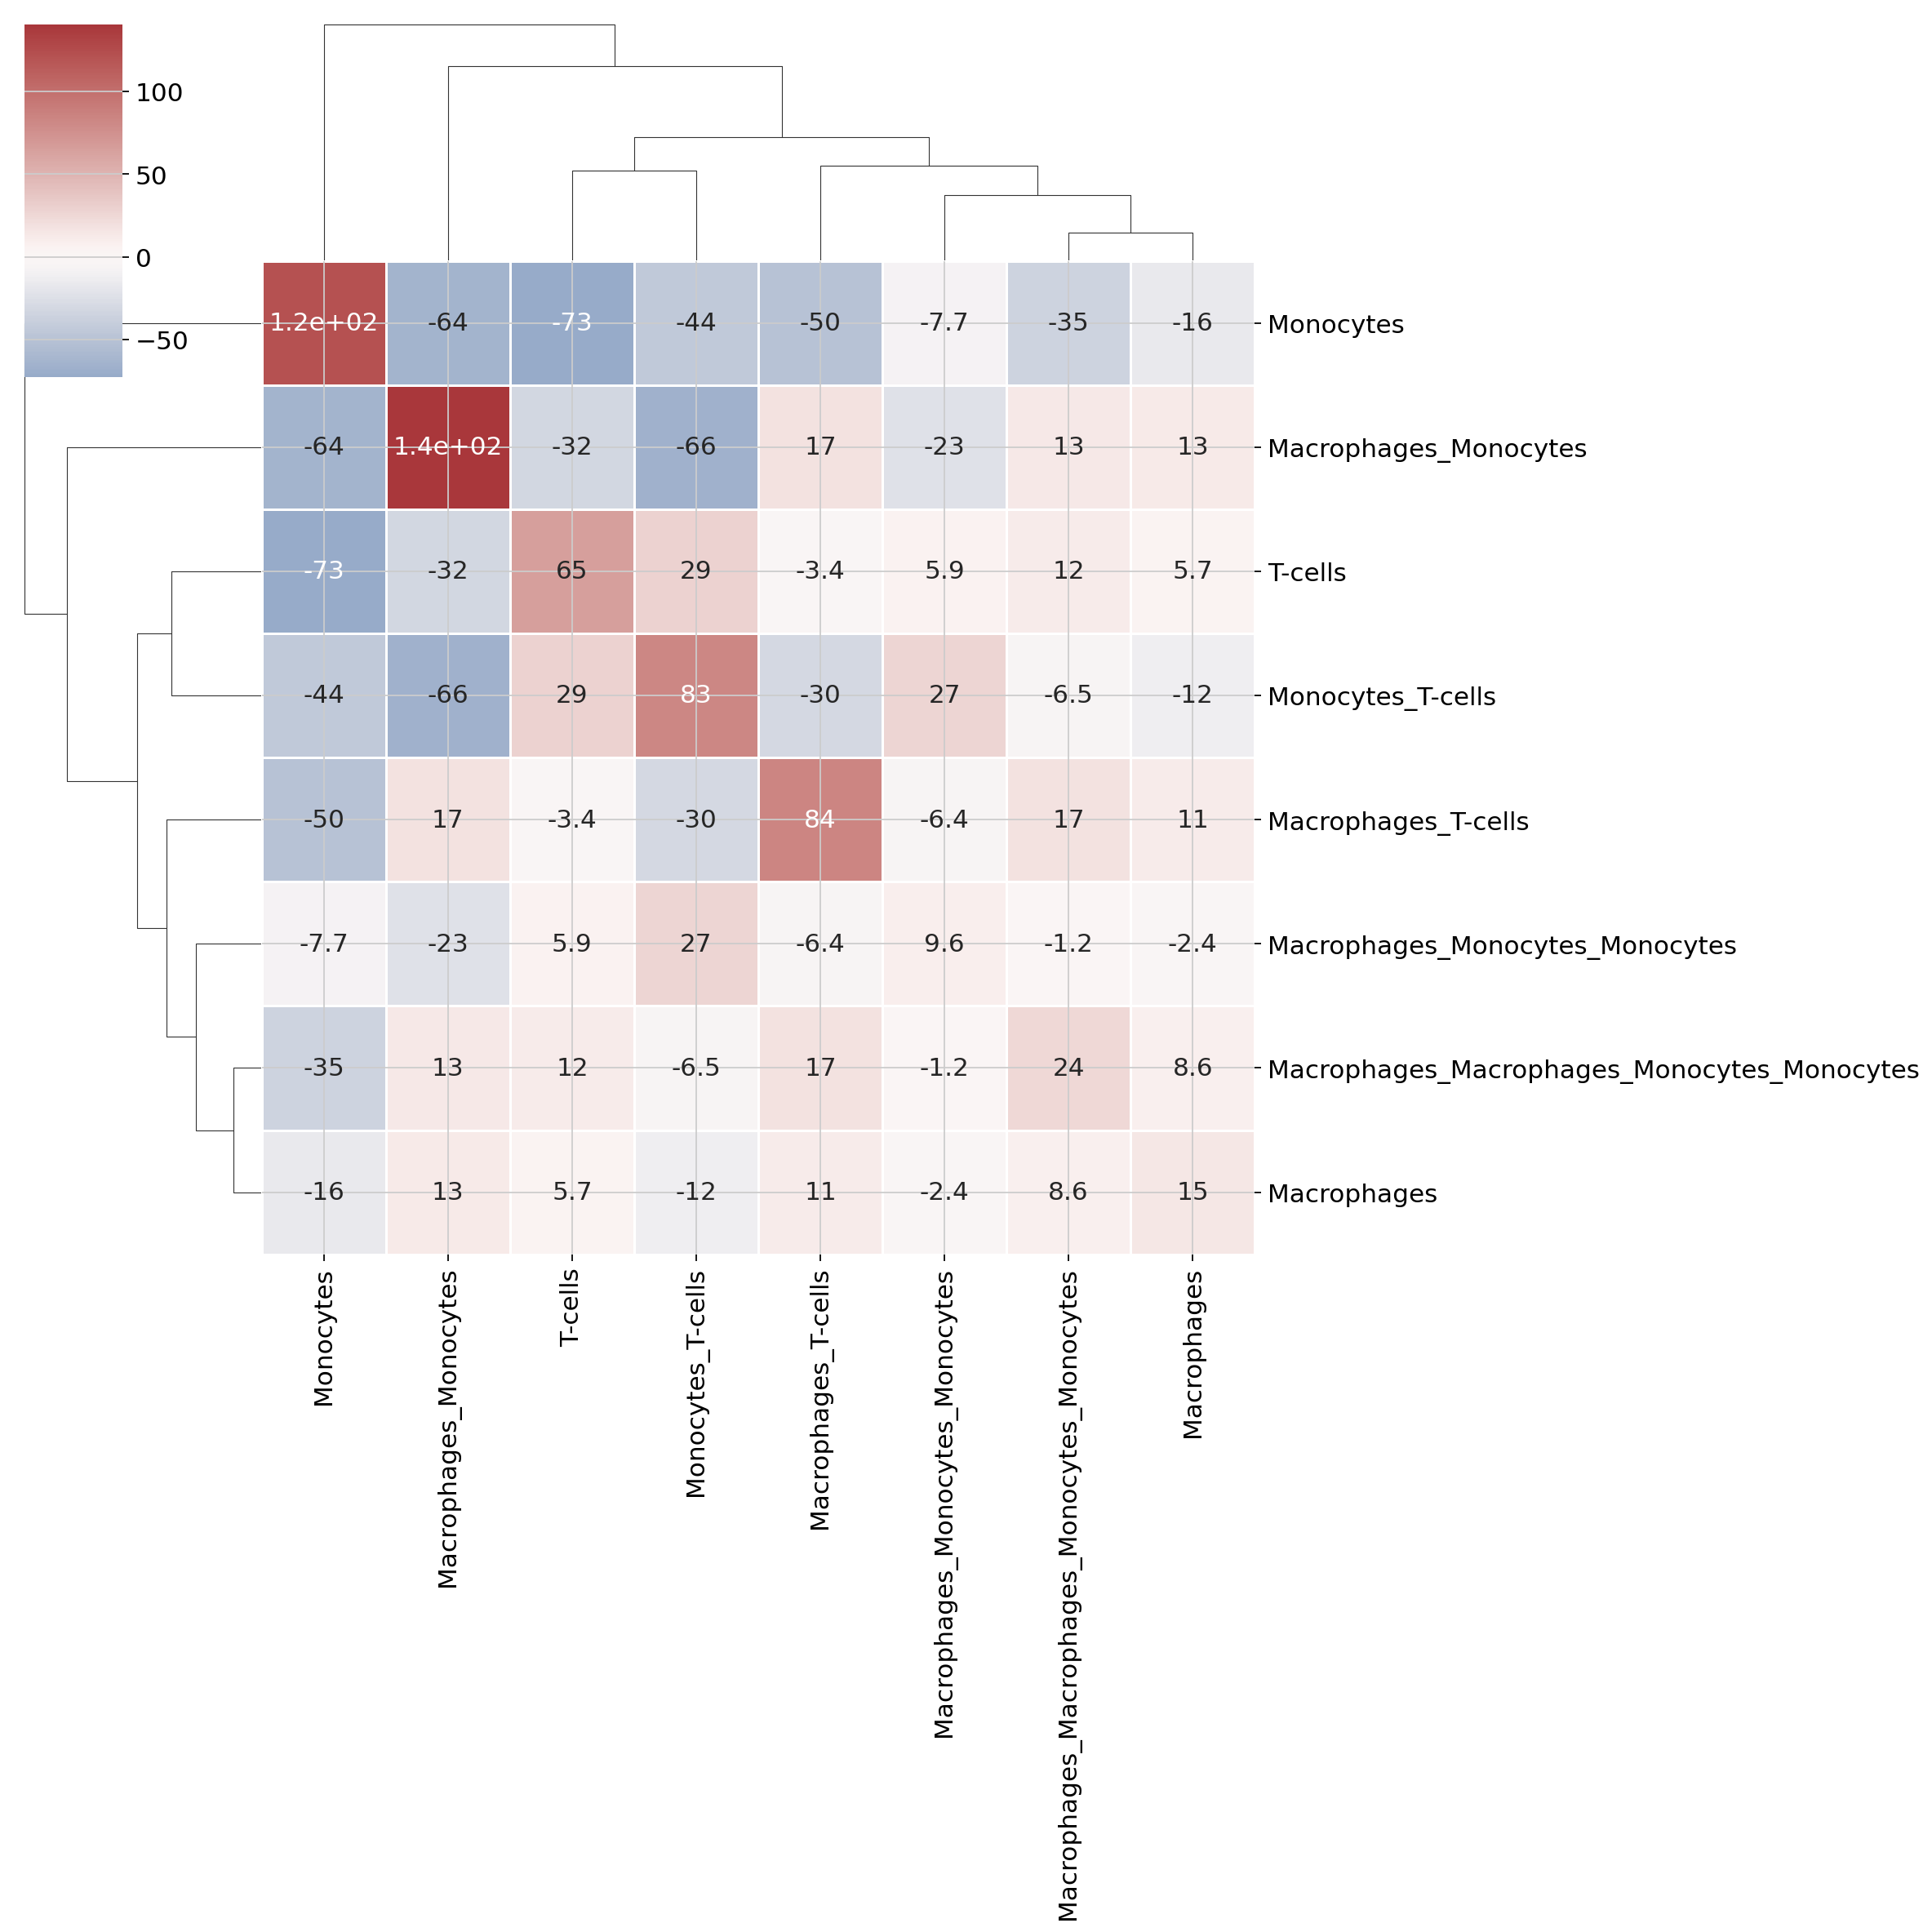

In [76]:
sns.clustermap(mixmat_zscore, center=0, cmap="vlag", annot=True, linewidths=.5, figsize=(15, 15))